## Fitting drug response curves with sigmoid function

1. Test different fitting function:
2. visualise fitting and analyse errors
3. Make visualisation of absolute and relative methods of estimaton of IC50

In [1]:
import pandas as pd
import numpy as np


from tqdm import tqdm
import warnings
from fitting import *

warnings.filterwarnings("ignore")
_FOLDER = "data/"
_FOLDER_2 = "figures/"

In [2]:
import os
os.listdir("results")

['filt_auc_limit_02.csv',
 'filt_1234.csv',
 'filt_auc_limit_06.csv',
 'filt_123.csv',
 'filt_auc_limit_04.csv']

## Fitting data

In [3]:
df = pd.read_csv("results/filt_auc_limit_02.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'auc', 'spearman_r', 'count_missing'],
      dtype='object')

### sigmoid_4_param

In [4]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 12169/12169 [01:14<00:00, 163.58it/s]

R2>0: (8253, 33)
R2>0.9 7769
Number of samples with fitting <0.1: 385

CPU times: user 1min 14s, sys: 298 ms, total: 1min 14s
Wall time: 1min 14s


## Visual Analysis of fitting efficiency

### All samples

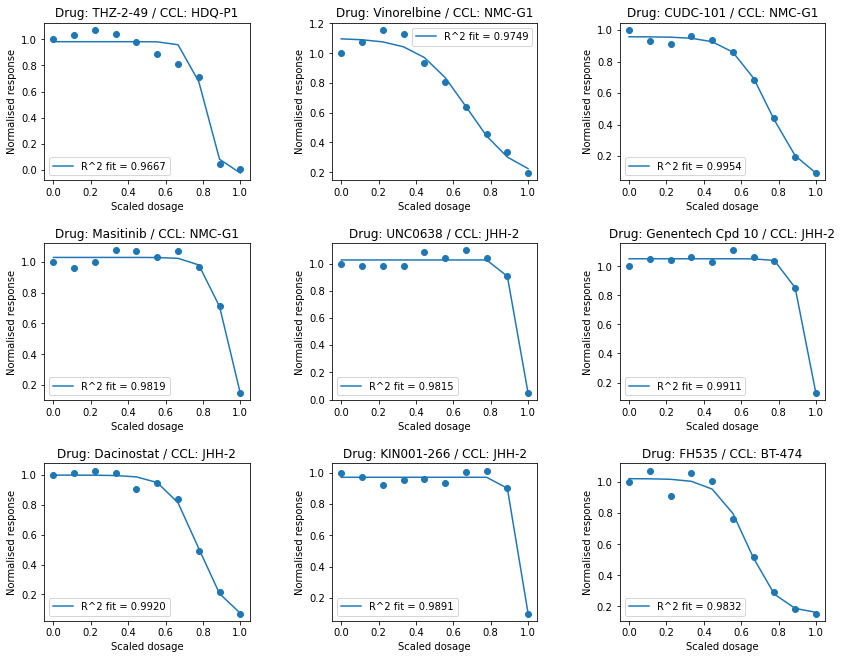

In [5]:
# ShowResponseCurvesWithFitting(df.drop(["drug_name", "CCL_name"],axis=1), plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
#                         indexes=df.index[:9],fitting_function = fitting_function, 
#                                   fitting_parameters =fitting_function)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### Bad fitting examples (examination after analysis of predictive models)

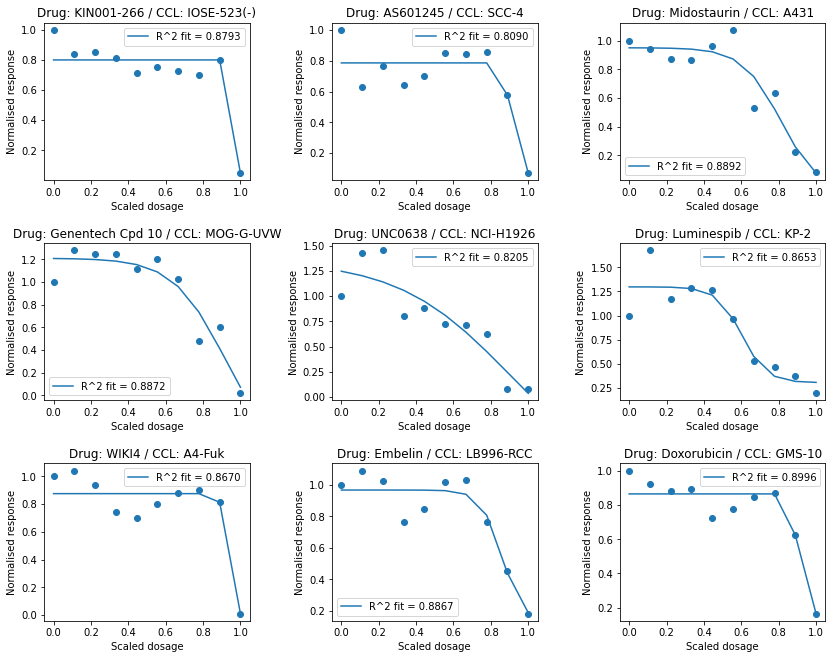

In [6]:
df2= df[(df[fitting_function+"_r2"]>0.1)& (df[fitting_function+"_r2"]<0.9)]

ShowResponseCurvesWithFitting(df2, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes= df2.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_2_param

100%|██████████| 8253/8253 [00:05<00:00, 1395.11it/s]


R2>0: (8253, 35)
R2>0.9 7364
CPU times: user 6.06 s, sys: 27.8 ms, total: 6.09 s
Wall time: 6.05 s


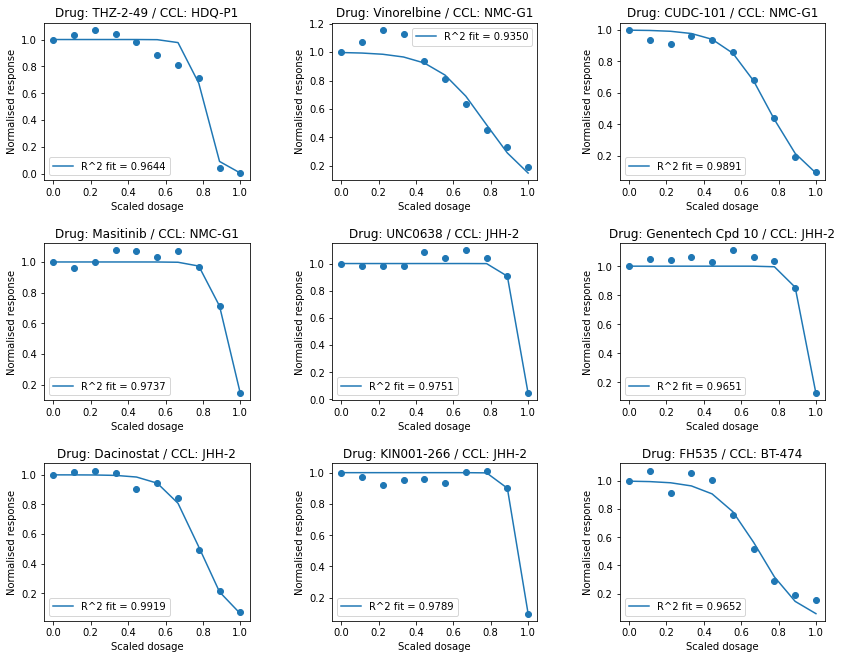

In [7]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

100%|██████████| 8253/8253 [00:09<00:00, 829.46it/s]


R2>0: (8230, 37)
R2>0.9 8024
CPU times: user 10.1 s, sys: 52.1 ms, total: 10.2 s
Wall time: 10.1 s


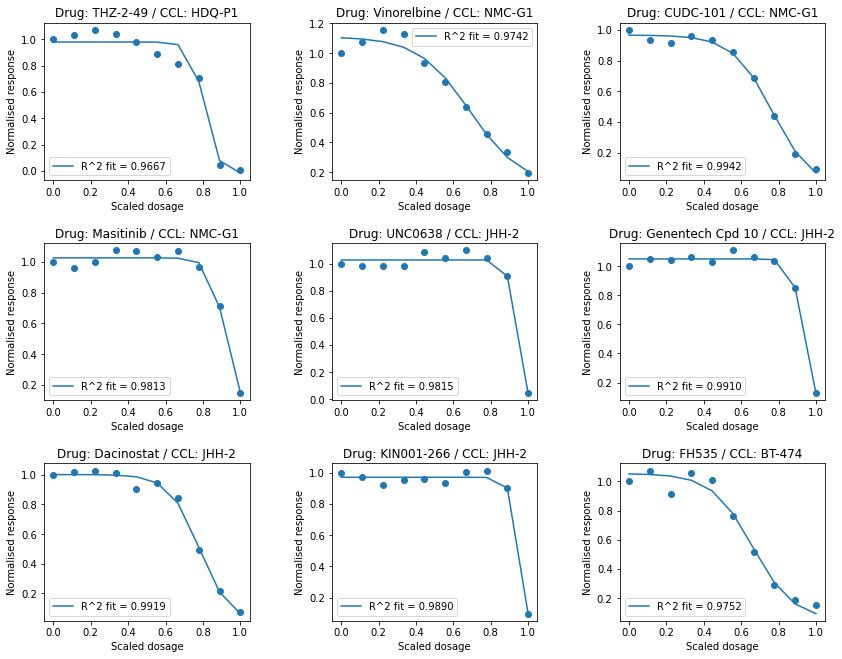

In [8]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### fsigmoid

100%|██████████| 8230/8230 [00:06<00:00, 1263.60it/s]


(8228, 39)


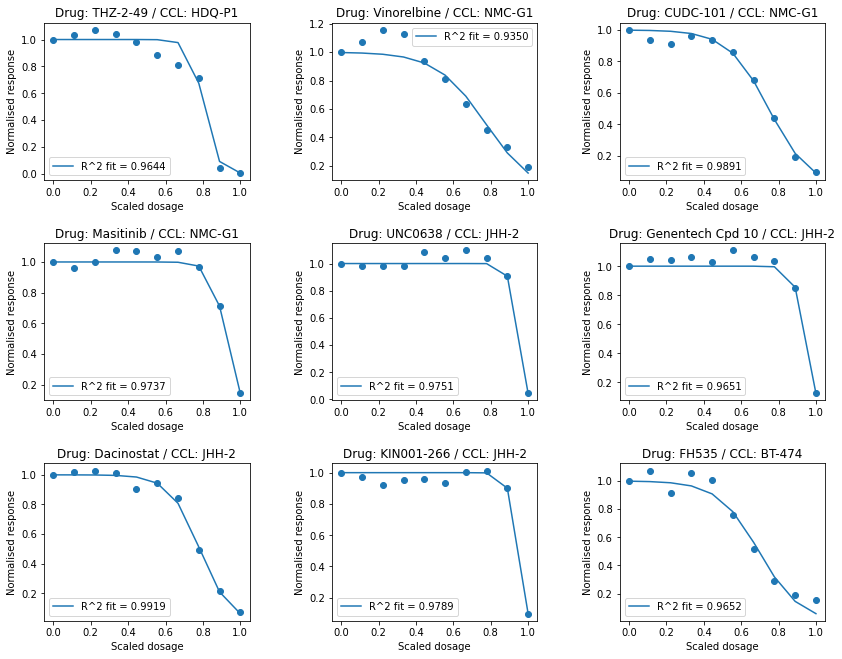

In [9]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

100%|██████████| 8228/8228 [00:19<00:00, 432.02it/s]


R2>0: (7955, 41)
R2>0.9 7826
CPU times: user 19.2 s, sys: 116 ms, total: 19.3 s
Wall time: 19.2 s


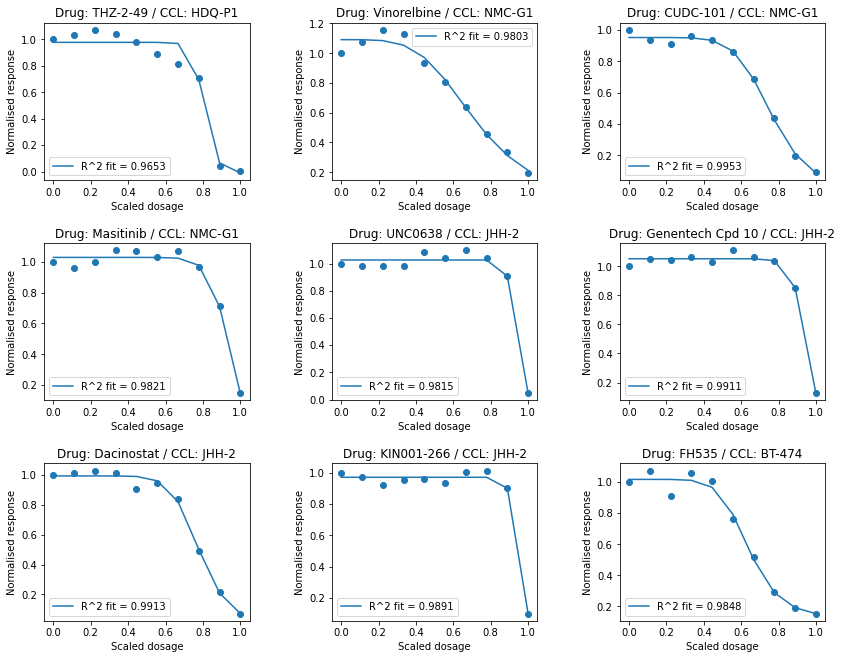

In [10]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

In [11]:
df[df["logistic_4_param_r2"]>0.9][["logistic_4_param", "logistic_4_param_r2"]]

,logistic_4_param,logistic_4_param_r2
0,"[0.9774450987355412, 24.96036737129365, 0.8071...",0.965288
1,"[1.090721306636655, 4.363214591513284, 0.71668...",0.980308
2,"[0.9519808581142127, 7.38988484774411, 0.76256...",0.995272
3,"[1.0297610666356982, 15.434149447760161, 0.958...",0.982129
4,"[1.026301462512543, 113.35230995668225, 0.9044...",0.981481
...,...,...
12161,"[1.0579706059887846, 5.389878728800332, 0.6206...",0.985137
12163,"[1.1001143737460704, 13.464318774201681, 0.751...",0.955672
12165,"[1.0469381551691272, 27.71883794831238, 0.6496...",0.997741
12166,"[0.9644769763939872, 11.99353765196583, 0.7148...",0.987249


### LL4_4_param

100%|██████████| 7955/7955 [00:19<00:00, 417.15it/s]


R2>0: (7911, 43)
R2>0.9 7783
CPU times: user 19.3 s, sys: 105 ms, total: 19.4 s
Wall time: 19.3 s


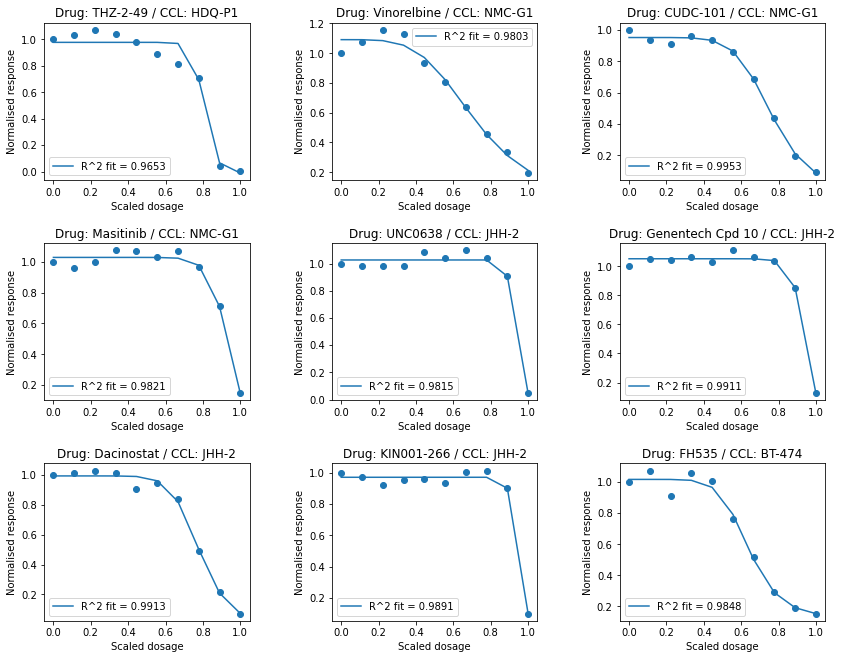

In [12]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

100%|██████████| 7911/7911 [00:17<00:00, 443.42it/s]


R2>0: (7772, 45)
R2>0.9 7649
CPU times: user 18 s, sys: 88.5 ms, total: 18.1 s
Wall time: 18 s


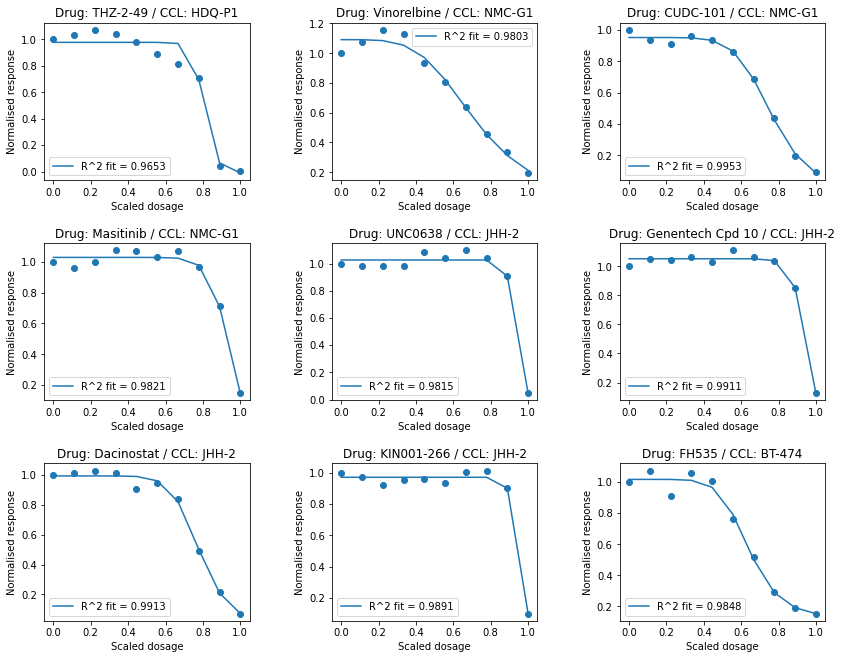

In [13]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

100%|██████████| 7772/7772 [00:20<00:00, 377.35it/s]


R2>0: (7574, 47)
R2>0.9 7113
CPU times: user 20.8 s, sys: 96.5 ms, total: 20.9 s
Wall time: 20.7 s


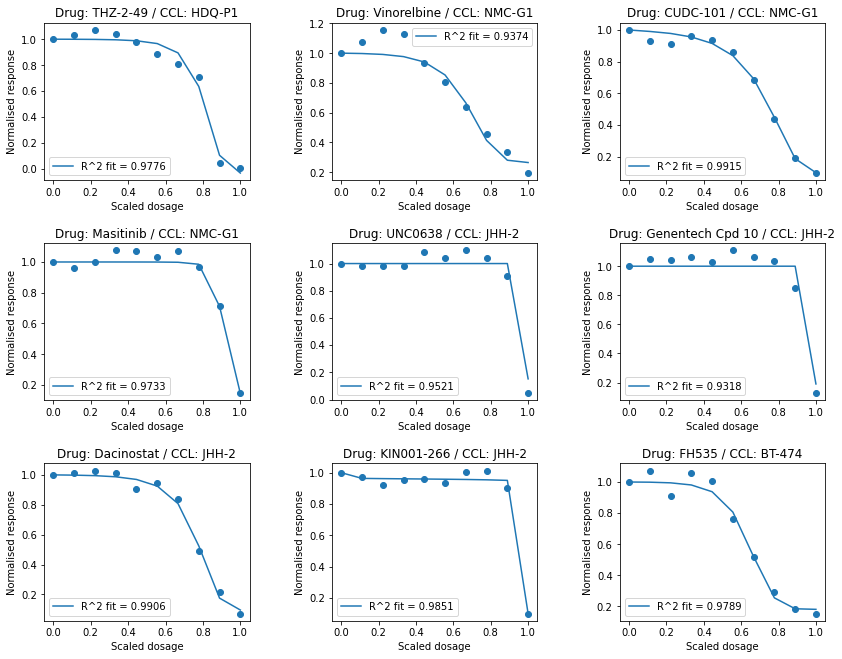

In [14]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [15]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [16]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

,fsigmoid_r2,logistic_4_param_r2,ll4_4_param_r2,ll4R_4_param_r2,sigmoid_2_param_r2,sigmoid_3_param_r2,logLogist_3_param_r2,sigmoid_4_param_r2,better_fitting
0,0.964416,0.965288,0.965288,0.965288,0.964416,0.966673,0.977597,0.966718,logLogist_3_param
1,0.935012,0.980308,0.980308,0.980308,0.935012,0.974226,0.937392,0.974905,ll4_4_param
2,0.989093,0.995272,0.995272,0.995272,0.989093,0.994160,0.991522,0.995441,sigmoid_4_param
3,0.973737,0.982129,0.982129,0.982129,0.973737,0.981305,0.973334,0.981916,ll4R_4_param
4,0.975088,0.981481,0.981481,0.981481,0.975088,0.981472,0.952086,0.981481,ll4R_4_param


In [17]:
df["better_fitting"].value_counts()

sigmoid_4_param      2214
ll4R_4_param         1544
ll4_4_param          1283
logLogist_3_param    1268
logistic_4_param     1242
sigmoid_3_param        23
Name: better_fitting, dtype: int64

In [18]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.98
logistic_4_param,4831
ll4_4_param,4830
ll4R_4_param,4830
sigmoid_4_param,4792
sigmoid_3_param,4100
logLogist_3_param,3624
fsigmoid,2787
sigmoid_2_param,2770


In [19]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.95
logistic_4_param,6869
ll4_4_param,6869
ll4R_4_param,6869
sigmoid_4_param,6763
sigmoid_3_param,6584
logLogist_3_param,5961
fsigmoid,5468
sigmoid_2_param,5434


In [20]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.9
logistic_4_param,7471
ll4_4_param,7471
ll4R_4_param,7471
sigmoid_3_param,7408
sigmoid_4_param,7275
logLogist_3_param,7113
fsigmoid,6877
sigmoid_2_param,6857


In [21]:
df.shape

(7574, 48)

In [23]:
df.to_csv("fit_auc_02.csv", index=False)

In [28]:
df2 = pd.read_csv("fit_1234.csv").drop("Unnamed: 0", axis=1)

In [27]:
df2.to

,Unnamed: 0,CELL_LINE_NAME,COSMIC_ID,DRUG_ID,DRUGID_COSMICID,FOLD_DILUTION,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,...,fsigmoid,logistic_4_param_r2,logistic_4_param,ll4_4_param_r2,ll4_4_param,ll4R_4_param_r2,ll4R_4_param,logLogist_3_param_r2,logLogist_3_param,better_fitting
0,0,SF539,905984,200,200_905984,2,1.024,0,0.111111,0.222222,...,[ 0.55588085 -10.38908844],0.997826,[0.96689091 6.55582604 0.55358802 0.01297612],0.997826,[0.55358802 0.96689094 6.5558234 0.01297606],0.997826,[-3.87668351 0.96689096 6.55582153 0.01297602],0.998213,[-0.26194561 -3.77946761 0.05165115],sigmoid_4_param
1,1,TC-71,1240221,1149,1149_1240221,2,5.000,0,0.111111,0.222222,...,[ 0.52210987 -13.42939703],0.999289,[0.97919938 7.81265944 0.51622925 0.02159245],0.999289,[0.51622925 0.97919937 7.81266027 0.02159246],0.999289,[-5.16576031 0.97919941 7.81265374 0.02159236],0.998192,[-0.2880783 -5.09695202 0.04280778],logistic_4_param
2,2,KARPAS-620,1327775,344,344_1327775,2,20.000,0,0.111111,0.222222,...,[ 0.48688605 -12.13507947],0.986721,[ 0.93737319 7.03075351 0.50553008 -0.03416808],0.986721,[ 0.50552994 0.93737345 7.0307347 -0.03416824],0.986721,[-4.79600551 0.93737337 7.03074114 -0.03416818],0.991331,[-0.30560283 -3.94337629 -0.01882654],logLogist_3_param
3,3,HEL,907053,179,179_907053,2,32.000,0,0.111111,0.222222,...,[ 0.46308473 -6.78713569],0.998696,[0.99615372 3.67668497 0.4022821 0.09263479],0.998696,[0.4022821 0.99615377 3.67668312 0.09263471],0.998696,[-3.34799516 0.99615378 3.67668398 0.0926348 ],0.997779,[-0.39869384 -3.70350846 0.14928206],ll4_4_param
4,4,SF539,905984,235,235_905984,2,10.240,0,0.111111,0.222222,...,[ 0.42247106 -20.22324172],0.996546,[ 9.62563220e-01 9.65231626e+00 4.27385352e-...,0.996546,[ 4.27385177e-01 9.62563522e-01 9.65227687e+...,0.996546,[-8.20515079e+00 9.62563071e-01 9.65233502e+...,0.997028,[-3.73094131e-01 -7.22533324e+00 -3.97817830e-03],sigmoid_4_param
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,2595,MOG-G-UVW,908145,163,163_908145,2,2.560,0,0.111111,0.222222,...,[ 0.73142923 -4.45534874],0.977509,[0.95549843 4.25471161 0.6144549 0.21672812],0.977509,[0.61445444 0.95549775 4.25475332 0.21673032],0.977509,[-2.07217303 0.95549713 4.25479084 0.21673227],0.985933,[-0.24238533 -2.30648096 0.3104955 ],logLogist_3_param
2548,2596,P30-OHK,909252,170,170_909252,2,16.000,0,0.111111,0.222222,...,[ 0.32080086 -27.16122926],0.998861,[9.66124804e-01 1.11159239e+01 3.25049705e-01 ...,0.998861,[3.25049757e-01 9.66124706e-01 1.11159640e+01 ...,0.998861,[-1.24918624e+01 9.66124711e-01 1.11159619e+...,0.998516,[-4.94242910e-01 -9.82951520e+00 1.09185752e-03],sigmoid_4_param
2549,2597,P12-ICHIKAWA,909251,180,180_909251,2,0.512,0,0.111111,0.222222,...,[ 0.4758794 -5.55153952],0.990675,[ 1.01648124 1.82817393 0.54497603 -0.24802937],0.990675,[ 0.5449727 1.01647968 1.82819394 -0.24802121],0.990675,[-1.10975495 1.01647932 1.82819858 -0.24801931],0.977978,[-0.36738711 -2.12283264 0.09674953],ll4_4_param
2550,2598,MKN28,908139,274,274_908139,2,20.000,0,0.111111,0.222222,...,[ 0.73131049 -3.81509065],0.994144,[0.9852256 3.20298946 0.52726107 0.2689897 ],0.994144,[0.52726059 0.98522512 3.20300987 0.26899129],0.994144,[-2.05012466 0.98522498 3.20301617 0.26899178],0.995941,[-0.31106728 -2.65974501 0.3729612 ],sigmoid_4_param
